In [2]:
import json
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [3]:
%matplotlib notebook

+ Hu, K.-N., Song, C., Yu, H., Swager, T. M., & Griffin, R. G. (2008). High-frequency dynamic nuclear polarization using biradicals: A multifrequency EPR lineshape analysis. The Journal of Chemical Physics, 128(5), 052302. https://doi.org/10.1063/1.2816783

TOTAPOL

| e-e distance | g-tensor Euler (Active) | e-e orientation |
| --- | --- | --- |
| 13.1 A | $\alpha$ -124, $\beta$ -108, $\gamma$ -107 | $\alpha$ 127, $\beta$ 94 |

In [10]:
# held 1st e at (0,0,0)
# derive coordinate for the 2nd e
z = np.cos(94 / 180.0 * np.pi) * 13.1
xy = np.sin(94 / 180.0 * np.pi) * 13.1
print(f'z: {z}, xy: {xy}')
x = np.cos(127/180.0 * np.pi) * xy
y = np.sin(127/180.0 * np.pi) * xy
print(f'x: {x}, y: {y}')

z: -0.9138098060480419, xy: 13.068089058403697
x: -7.864572319236251, y: 10.436639970501682


## Examine json file downloaded from https://pubchem.ncbi.nlm.nih.gov/compound/101411753#section=3D-Conformer

In [3]:
totapol_json_file = 'Conformer3D_CID_101411753.json'

In [4]:
with open(totapol_json_file, 'r', encoding='utf-8') as f:
    totapol_js = json.load(f)

In [5]:
totapol_js.keys()

dict_keys(['PC_Compounds'])

In [6]:
len(totapol_js['PC_Compounds'])

1

In [7]:
totapol_js['PC_Compounds'][0].keys()

dict_keys(['id', 'atoms', 'bonds', 'stereo', 'coords', 'props', 'count'])

In [8]:
totapol_js = totapol_js['PC_Compounds'][0]

In [9]:
totapol_js['id']

{'id': {'cid': 101411753}}

In [10]:
totapol_js['atoms'].keys()

dict_keys(['aid', 'element', 'charge'])

In [11]:
# H, C, N, O
np.unique(totapol_js['atoms']['element'])

array([1, 6, 7, 8])

In [12]:
len(totapol_js['coords'])

1

In [13]:
coords = totapol_js['coords'][0]

In [14]:
coords.keys()

dict_keys(['type', 'aid', 'conformers', 'data'])

In [15]:
len(coords['conformers'])

1

In [16]:
coords['conformers'][0].keys()

dict_keys(['x', 'y', 'z', 'data'])

In [17]:
x = coords['conformers'][0]['x']
y = coords['conformers'][0]['y']
z = coords['conformers'][0]['z']

In [18]:
totapol_js['bonds'].keys()

dict_keys(['aid1', 'aid2', 'order'])

In [19]:
aid1 = totapol_js['bonds']['aid1']
aid2 = totapol_js['bonds']['aid2']

In [20]:
bonds = []
for atom1, atom2 in zip(aid1, aid2):
    temp_x = [x[atom1-1], x[atom2-1]]
    temp_y = [y[atom1-1], y[atom2-1]]
    temp_z = [z[atom1-1], z[atom2-1]]
    bonds.append([temp_x, temp_y, temp_z])

In [21]:
color_identities = {
    1: '#C0C0C0',
    6: '#778899',
    7: '#0000FF',
    8: '#FF0000'
}

In [22]:
colors = [color_identities[i] for i in totapol_js['atoms']['element']]

<IPython.core.display.Javascript object>


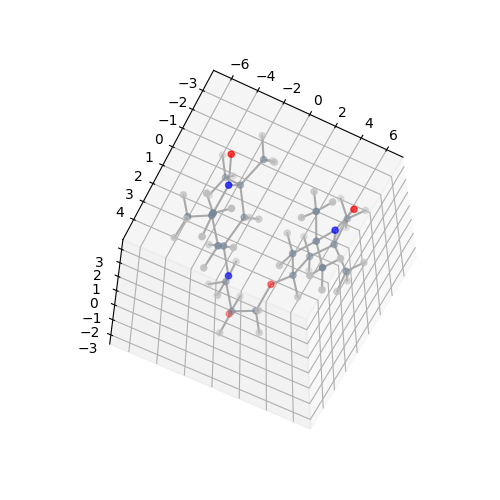

In [41]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker='o', c=colors)
for bond in bonds:
    temp_x, temp_y, temp_z = bond
    ax.plot(temp_x, temp_y, temp_z, c='#A9A9A9')
plt.show()

In [24]:
# select the two CO bonds
elements = totapol_js['atoms']['element']
bonds_selected = []
elements_selected = []

for atom1, atom2 in zip(aid1, aid2):
    two_elements = [elements[atom1-1], elements[atom2-1]]
    two_elements = sorted(two_elements)
    if two_elements == [7,8]:
        temp_x = [x[atom1-1], x[atom2-1]]
        temp_y = [y[atom1-1], y[atom2-1]]
        temp_z = [z[atom1-1], z[atom2-1]]
        bonds_selected.append([temp_x, temp_y, temp_z])
        elements_selected += two_elements
        
x_selected, y_selected, z_selected = [], [], []
for temp_xs, temp_ys, temp_zs in bonds_selected:
    x_selected += temp_xs
    y_selected += temp_ys
    z_selected += temp_zs
    
colors_selected = [color_identities[i] for i in elements_selected]

In [25]:
bonds_selected

[[[-4.7671, -3.9931], [-2.5706, -1.3567], [0.5048, 0.282]],
 [[4.0645, 3.66], [-2.9075, -1.6918], [-0.11, -0.1322]]]

In [49]:
n1 = [-3.9931, -1.3567, 0.282]
n2 = [3.66, -1.6918, -0.1322]
o1 = [-4.7671, -2.5706, 0.5048]

In [53]:
def calc_distance(pt1, pt2):
    arr1 = np.array(pt1)
    arr2 = np.array(pt2)
    v21 = arr1 - arr2
    dist = np.sqrt(v21.dot(v21))
    return dist

In [56]:
d_n1n2 = calc_distance(n1, n2)
print(f'Two Nitrogens are {d_n1n2} Anstroms apart')

d_n1o1 = calc_distance(n1, o1)
print(f'N1-O1: {d_n1o1}')
d_n2o1 = calc_distance(n2, o1)
print(f'N2-O1: {d_n2o1}')

Two Nitrogens are 7.67162259629604 Anstroms apart
N1-O1: 1.456800964442295
N2-O1: 8.496709530753654


In [55]:
def calc_angle(a, b, c):
    cos_angle = (a**2 + b**2 - c**2)/(2. * a * b)
    angle = np.arccos(cos_angle)
    return angle / np.pi * 180.0

In [57]:
calc_angle(d_n1o1, d_n1n2, d_n2o1)

120.12434378305461

In [58]:
d_n1n2 * np.cos(120.1 * np.pi / 180)

-3.847401103477575

In [59]:
d_n1n2 * np.sin(120.1 * np.pi / 180)

6.637115187260165

In [4]:
8 * np.cos(120.1 * np.pi / 180)

-4.012085897275656

In [5]:
8 * np.sin(120.1 * np.pi / 180)

6.921211364557637

<IPython.core.display.Javascript object>


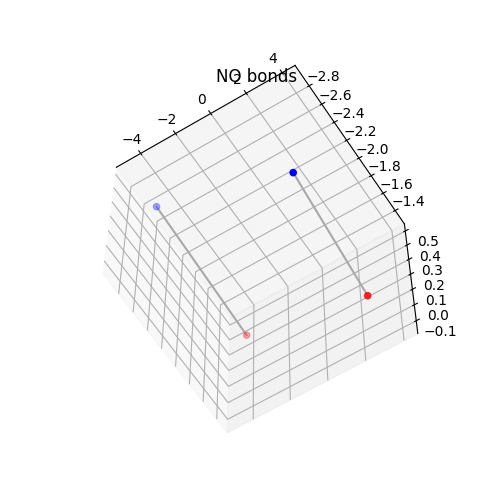

In [48]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_selected, y_selected, z_selected, marker='o', c=colors_selected)
for bond in bonds_selected:
    temp_x, temp_y, temp_z = bond
    ax.plot(temp_x, temp_y, temp_z, c='#A9A9A9')
plt.title('NO bonds')
plt.show()

### To get the angles between the two bonds

In [27]:
coords1 = np.array(bonds_selected[0])
coords2 = np.array(bonds_selected[1])

In [28]:
coords1.shape

(3, 2)

In [29]:
vec1 = coords1[:, 1] - coords1[:, 0]
vec1

array([ 0.774 ,  1.2139, -0.2228])

In [30]:
vec2 = coords2[:, 1] - coords2[:, 0]
vec2

array([-0.4045,  1.2157, -0.0222])

In [31]:
vec1to2 = vec2 - vec1
vec1to2

array([-1.1785,  0.0018,  0.2006])

In [32]:
a = np.sqrt(np.sum(vec1**2))
b = np.sqrt(np.sum(vec2**2))
c = np.sqrt(np.sum(vec1to2**2))

In [33]:
theta = np.arccos((a**2 + b**2 - c**2)/(2*a*b))

In [34]:
theta * 180.0/np.pi

51.28372115899322